# 단순선형회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 아버지-아들 키 

In [36]:
df=pd.read_csv('http://www.randomservices.org/random/data/Galton.txt',sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 father, son으로 변경 
- 단위 변경 inch-->centi

In [20]:
df2=df[['Father','Gender','Height']]

m=['M']
df3 = df.loc[df2['Gender'].isin(m)]

df3=df3[['Father','Gender','Height']]

df3

,Father,Gender,Height
0,78.5,M,73.2
4,75.5,M,73.5
5,75.5,M,72.5
8,75.0,M,71.0
10,75.0,M,70.5
...,...,...,...
890,68.5,M,72.0
891,68.5,M,70.5
892,68.5,M,68.7
893,68.5,M,68.5


In [21]:
df3=df3.drop(['Gender'], axis=1)
df3

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [22]:
df3.rename(columns = {'Height' : 'son'}, inplace = True)
df3

,Father,son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [38]:
df4=df3*2.54
df4.reset_index(inplace=True,drop=True)
df4

,Father,son
0,199.39,185.928
1,191.77,186.690
2,191.77,184.150
3,190.50,180.340
4,190.50,179.070
...,...,...
460,173.99,182.880
461,173.99,179.070
462,173.99,174.498
463,173.99,173.990


In [37]:
df=df[df.Gender=='M']
df=df[['Father','Height']]
df.columns = ['Father' , 'son']
df=df*2.54

df.reset_index(inplace=True)
df=df[['Father','son']]
df

,Father,son
0,199.39,185.928
1,191.77,186.690
2,191.77,184.150
3,190.50,180.340
4,190.50,179.070
...,...,...
460,173.99,182.880
461,173.99,179.070
462,173.99,174.498
463,173.99,173.990


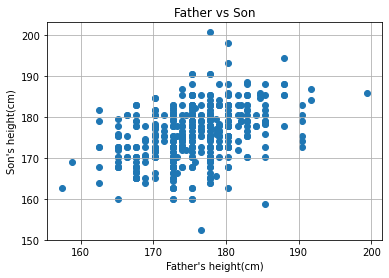

In [39]:
plt.scatter(df.Father,df.son)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq()
    - np.polyfit()

In [42]:
weight, bias = np.polyfit(df.Father, df.son, 1)
#x,y,차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [45]:
np.polyfit(df.Father, df.son, 2)
#2차식

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [48]:
#범위 설정
xs=np.array([156,201])
ys=xs * weight + bias

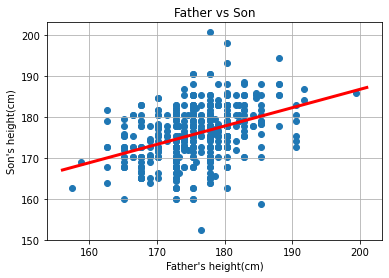

In [49]:
plt.scatter(df.Father, df.son)
plt.plot(xs, ys, 'r-',lw=3)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son')
plt.show()

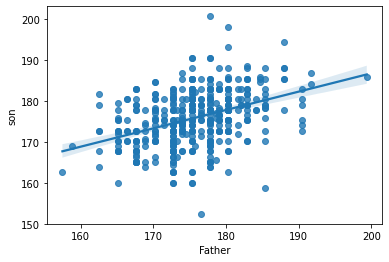

In [50]:
#쉽게 그리는 법
import seaborn as sns
sns.regplot(x='Father',y='son',data=df);
#선 주위 그림자는 95% 신뢰구간.

- Scikit learn으로 회귀식 구하기

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [55]:
#학습 메소드
# lr.fit(df.Father,df.son) <-이렇게 하면 차원 안 맞아서 안됨.

lr.fit(df[['Father']],df.son) #<-데이터 프레임으로 해서 차원 맞춰줌.
#lr.fit(df.Father.values.reshape(-1,1),df.son.values) <-이것도 됨.

LinearRegression()

In [56]:
# coefficient(계수),weight
lr.coef_ 
#앞에 weight, bias = np.polyfit(df.Father, df.son, 1) 의 weight 값 같음.

array([0.44774792])

In [57]:
# intercept(절편), bias
lr.intercept_
#앞에 weight, bias = np.polyfit(df.Father, df.son, 1) 의 bias 값 같음.

97.17763700739341

In [59]:
#잔차 제곱의 합(RSS:Residual sum of square)
lr._residues

17556.59951549399

In [60]:
#평가 - R squared. 성능평가함수.
lr.score(df.Father.values.reshape(-1,1),df.son.values)
#회귀선 주변에 값들이 얼마나 뭉쳐져 있는지.
#지금 값이 많이 퍼져있어서 썩 좋진 않음.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.15312927478307048

In [62]:
from sklearn.metrics import r2_score
pred=lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.son.values,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.15312927478307048

In [40]:
#참고
def sigmoid(x):
    """이 사이의 말이 힌트로 나옴.
    x는 넘파이 어레이 타입
    """
    return 1./(1+np.exp(-x))

In [ ]:
sigmoid()